# IMPORTING THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import re
import os
import time
import plotly.express as px


# READING THE FILE

In [2]:
data=pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

# INFORMATION ABOUT DATASET

In [3]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.shape   #displaying the records and columns

(303, 14)

In [7]:
data.loc[data.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
data.duplicated().sum()

1

About this dataset Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina Value 2: atypical angina Value 3: non-anginal pain Value 4: asymptomatic trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

In [10]:
data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [11]:
data.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [12]:
len(data["age"].unique())

41

In [13]:
data.value_counts

<bound method DataFrame.value_counts of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  t

# ANALYSIS 

# 1)UNI-VARIATE ANALYSIS:

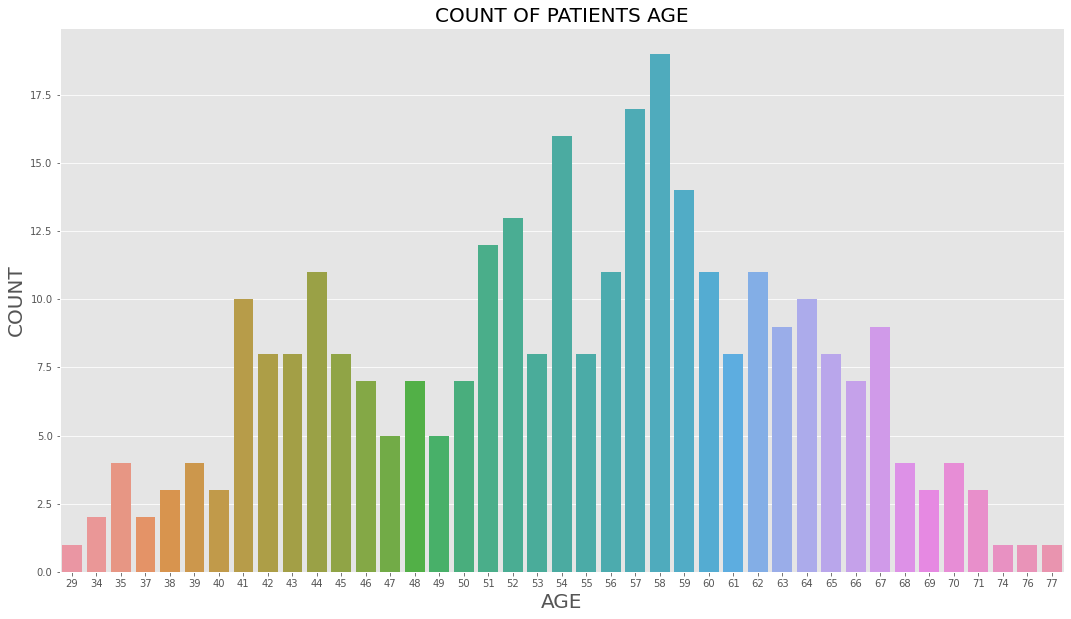

In [14]:
plt.figure(figsize=(18,10))
plt.style.use("ggplot")
sns.countplot(x=data["age"])    #using countplot
plt.title("COUNT OF PATIENTS AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

SO WE FIND THAT MOST OF THE PATIENTS HAVE AGE 58

In [15]:
data.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [16]:
s=data["sex"].value_counts().reset_index()
px.pie(s,names="index",values="sex")  #using pie here


So we find that around 207 are Male patients & 96 are Female patients:

In [17]:
c=data["cp"].value_counts().reset_index()
c

,index,cp
0,0,143
1,2,87
2,1,50
3,3,23


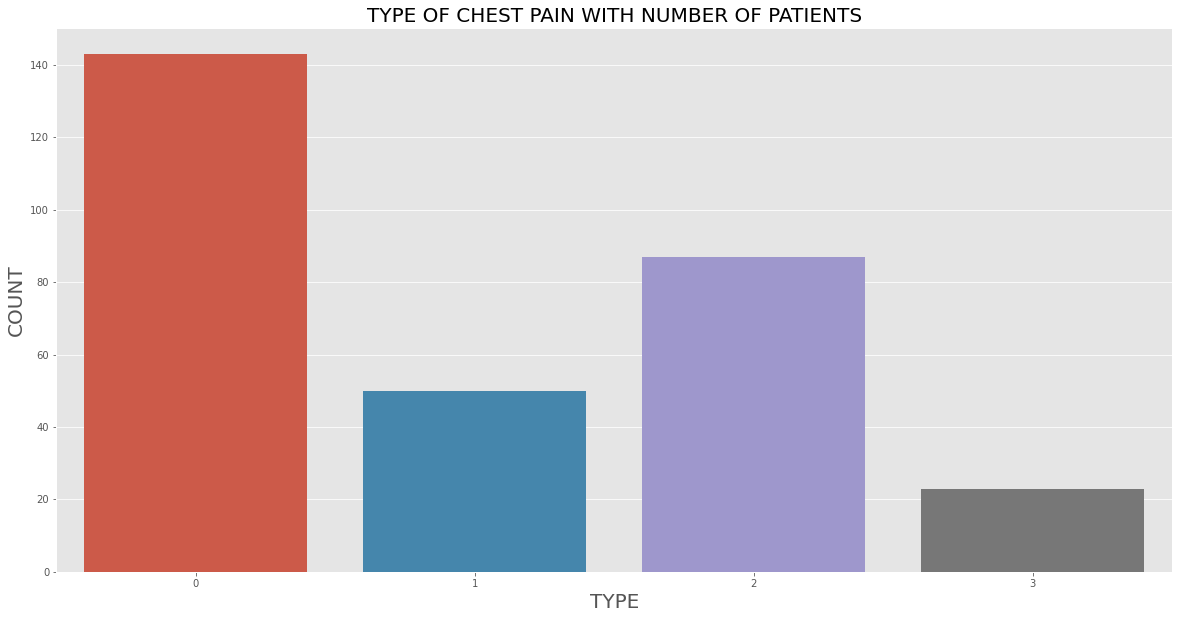

In [18]:
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.barplot(x=c["index"],y=c["cp"])   #using bar here for visualization
plt.title("TYPE OF CHEST PAIN WITH NUMBER OF PATIENTS",fontsize=20)
plt.xlabel("TYPE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

So we find that most of the patients have type Value 1 that is typical angina Value:

In [19]:
data.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


<Figure size 1440x720 with 0 Axes>

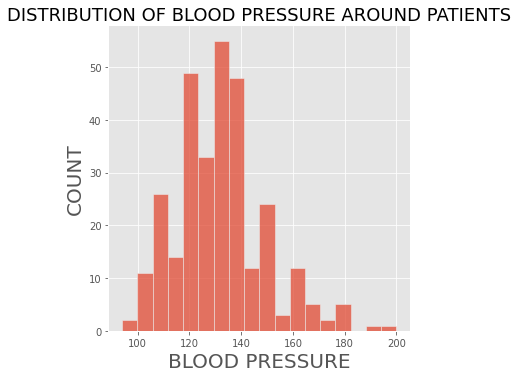

In [20]:
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.displot(data["trtbps"])   #using displot here
plt.title("DISTRIBUTION OF BLOOD PRESSURE AROUND PATIENTS",fontsize=18)
plt.xlabel("BLOOD PRESSURE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

<Figure size 1440x720 with 0 Axes>

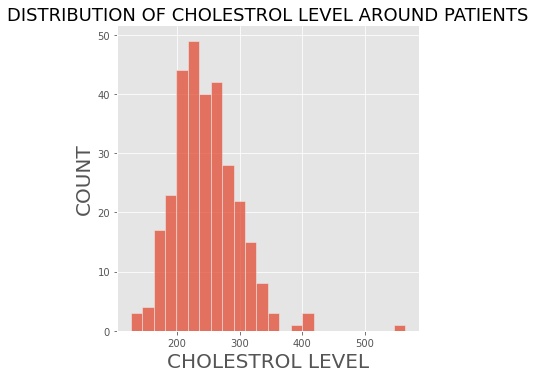

In [21]:
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.displot(data["chol"])
plt.title("DISTRIBUTION OF CHOLESTROL LEVEL AROUND PATIENTS",fontsize=18)
plt.xlabel("CHOLESTROL LEVEL",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

<Figure size 1440x720 with 0 Axes>

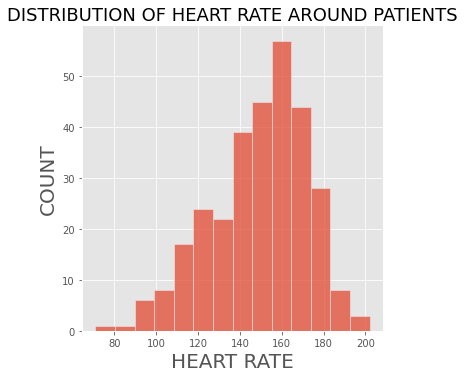

In [22]:
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.displot(data["thalachh"])
plt.title("DISTRIBUTION OF HEART RATE AROUND PATIENTS",fontsize=18)
plt.xlabel("HEART RATE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

In [23]:
data.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


# 2)BIVARIATE-ANALYSIS:

# 1)AGE

In [24]:
data[["age","output"]].value_counts().sort_values()

age  output
77   0          1
74   1          1
76   1          1
70   1          1
69   0          1
               ..
59   0          9
52   1          9
57   0         10
54   1         10
58   0         12
Length: 75, dtype: int64

In [25]:
v=pd.crosstab(data["age"],data["output"]).reset_index()

v.columns=["age","low_risk","high_risk"]
v

,age,low_risk,high_risk
0,29,0,1
1,34,0,2
2,35,2,2
3,37,0,2
4,38,1,2
5,39,1,3
6,40,2,1
7,41,1,9
8,42,1,7
9,43,3,5


In [26]:
px.line(v,v["age"],v["high_risk"],title="RISK OF HIGH HEART-ATTACK WITH AGE")


In [27]:
px.line(v,v["age"],v["low_risk"],title="RISK OF LOW HEART-ATTACK WITH AGE")

In [28]:
data.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


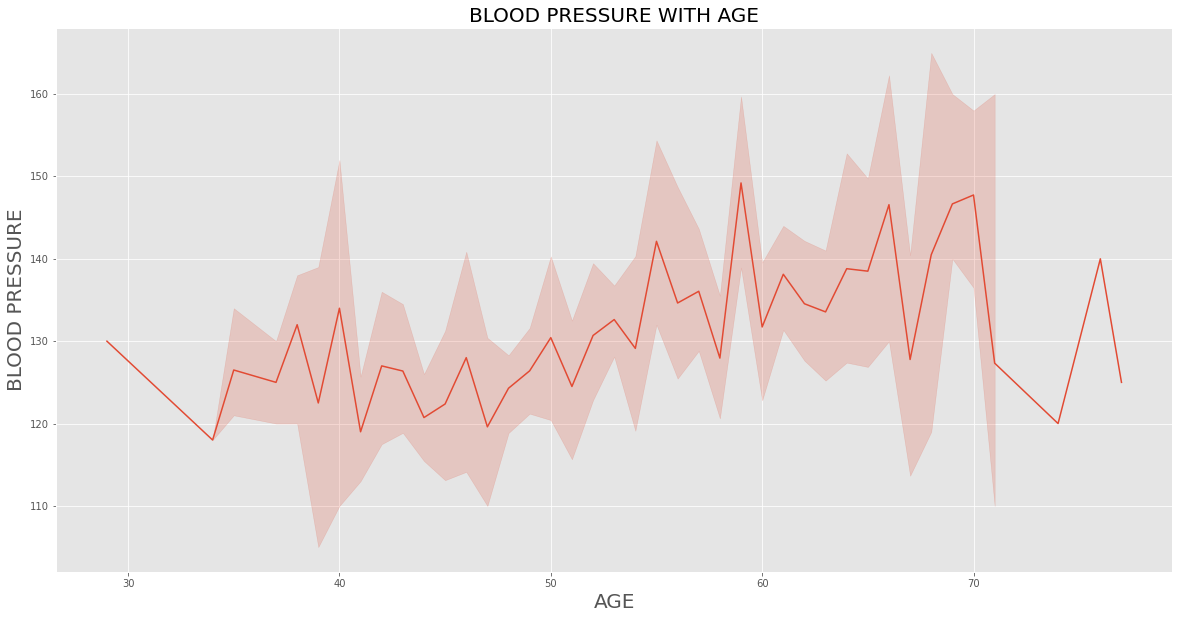

In [29]:
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.lineplot(y="trtbps",x="age",data=data)
plt.title("BLOOD PRESSURE WITH AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("BLOOD PRESSURE",fontsize=20)
plt.show()

SO WE FIND THAT THERE IS HIGH CHANCES OF INCREASE IN THE BLOOD PRESSURE WITH INCREASE IN THE AGE:

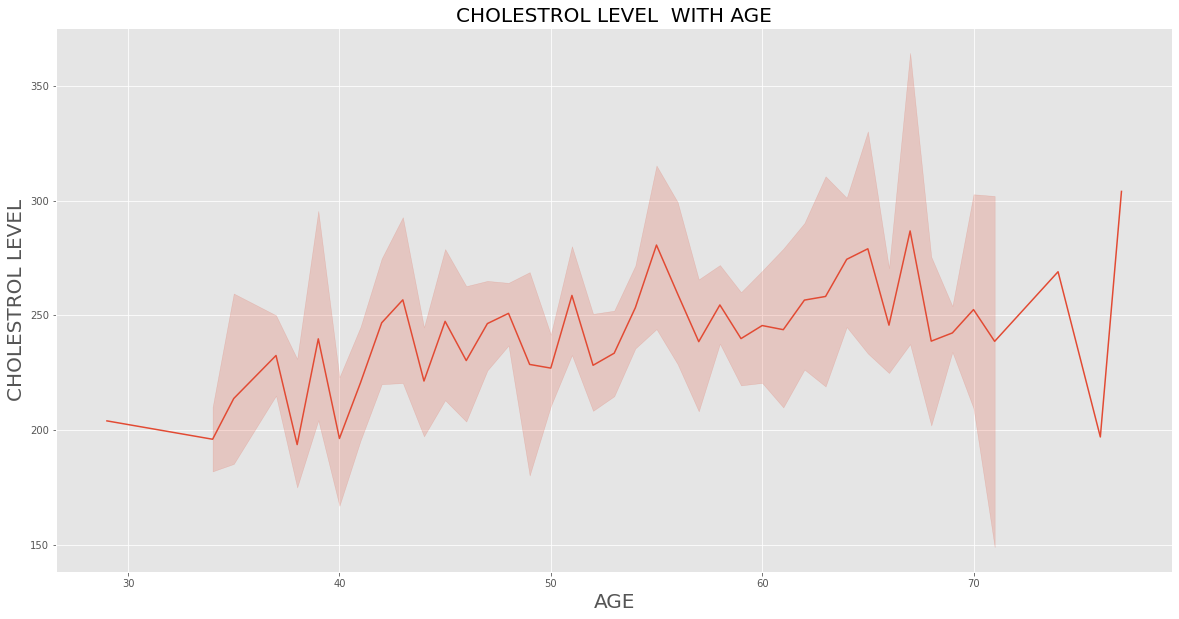

In [30]:
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.lineplot(y="chol",x="age",data=data)
plt.title("CHOLESTROL LEVEL  WITH AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("CHOLESTROL LEVEL",fontsize=20)
plt.show()

SO WE FIND THAT THERE IS HIGH CHANCES OF INCREASE IN CHOLESTROL LEVEL IN THE BODY WITH INCREASE IN THE AGE:

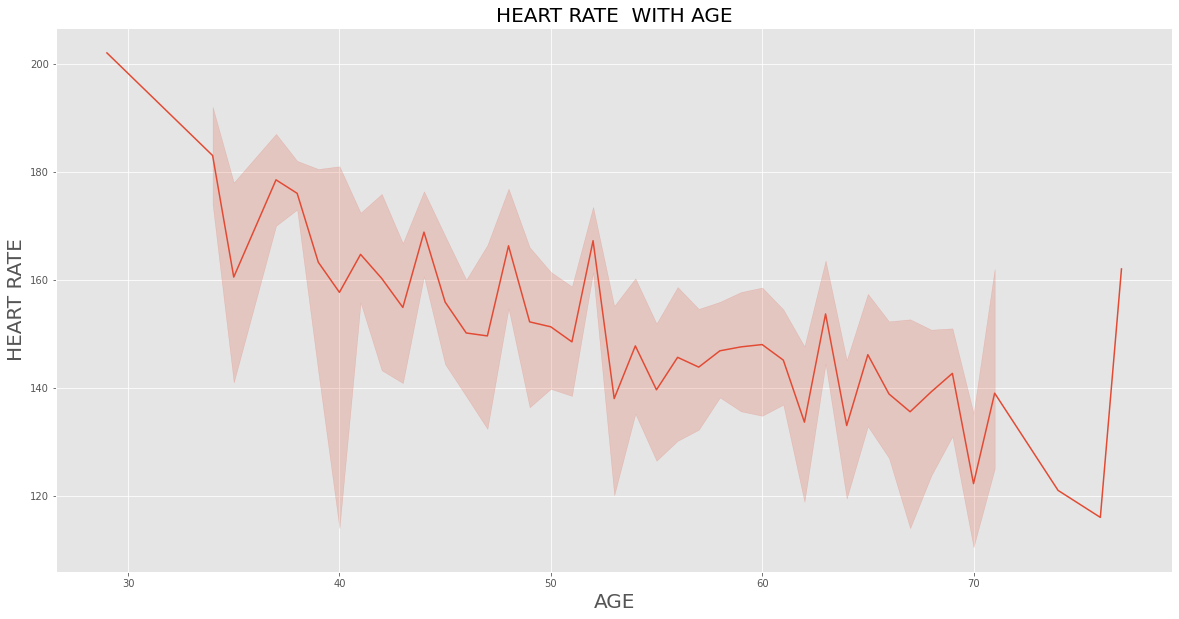

In [31]:
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.lineplot(y="thalachh",x="age",data=data)
plt.title("HEART RATE  WITH AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("HEART RATE",fontsize=20)
plt.show()

AS WE CAN SEE WITH INCREASE IN THE AGE OF THE PATIENTS THE HEART RATE IS GETTING LOWER:

In [32]:
data.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


# Q1) DOES INCREASE IN CHOLESTROL LEVEL IN BODY HAVE ANY EFFECT TOWARDS THE HEART ATTACK:

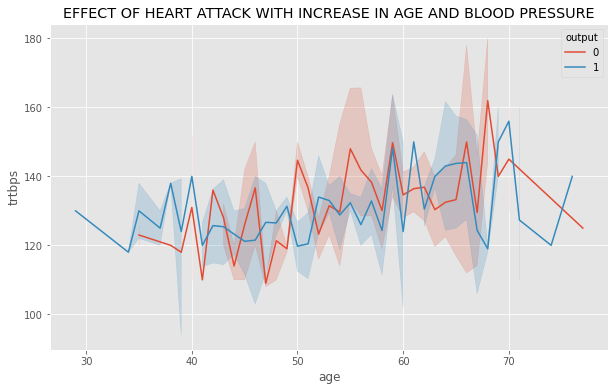

In [33]:
plt.figure(figsize=(10,6))
plt.style.use("ggplot")
sns.lineplot(x="age",y="trtbps",hue="output",data=data)
plt.title("EFFECT OF HEART ATTACK WITH INCREASE IN AGE AND BLOOD PRESSURE")
plt.show()

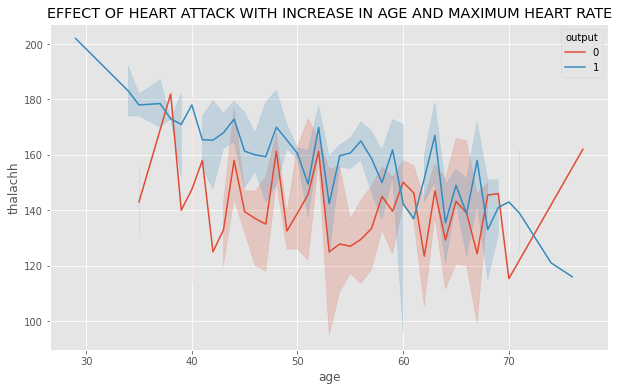

In [34]:
plt.figure(figsize=(10,6))
plt.style.use("ggplot")
sns.lineplot(x="age",y="thalachh",hue="output",data=data)
plt.title("EFFECT OF HEART ATTACK WITH INCREASE IN AGE AND MAXIMUM HEART RATE")
plt.show()

<AxesSubplot:>

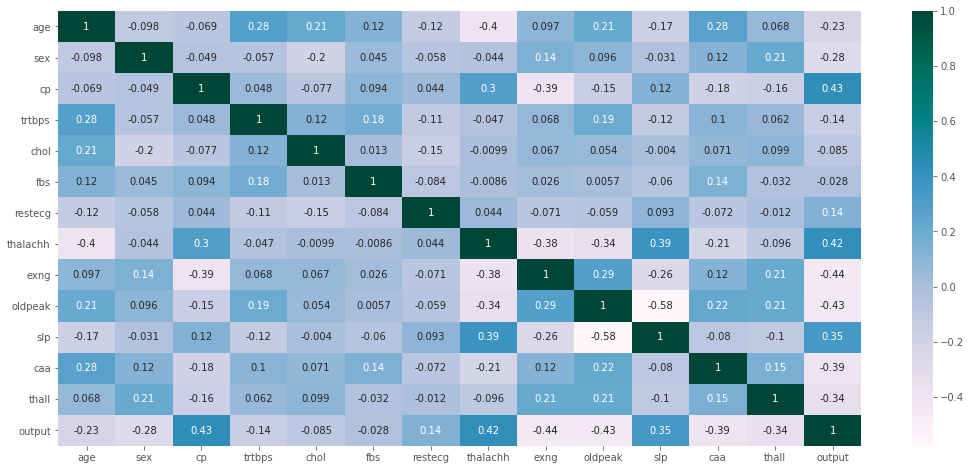

In [35]:
plt.figure(figsize=(18,8))
sns.heatmap(data.corr(),annot=True,cmap="PuBuGn")  #using heatmap here

<AxesSubplot:xlabel='output', ylabel='chol'>

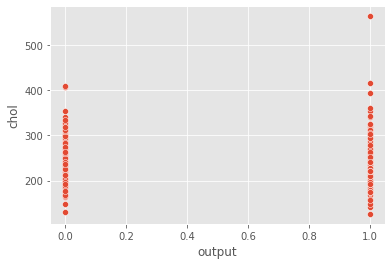

In [36]:
sns.scatterplot(y="chol",x="output",data=data)

<AxesSubplot:xlabel='output', ylabel='chol'>

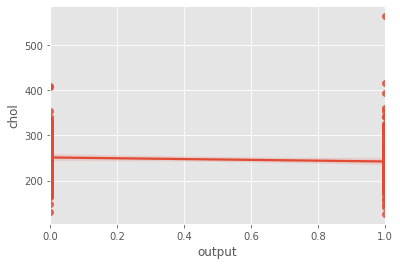

In [37]:
sns.regplot(y="chol",x="output",data=data)

<AxesSubplot:xlabel='output', ylabel='chol'>

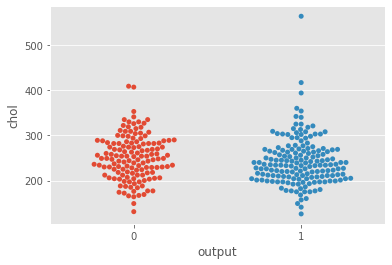

In [38]:
sns.swarmplot(y="chol",x="output",data=data)

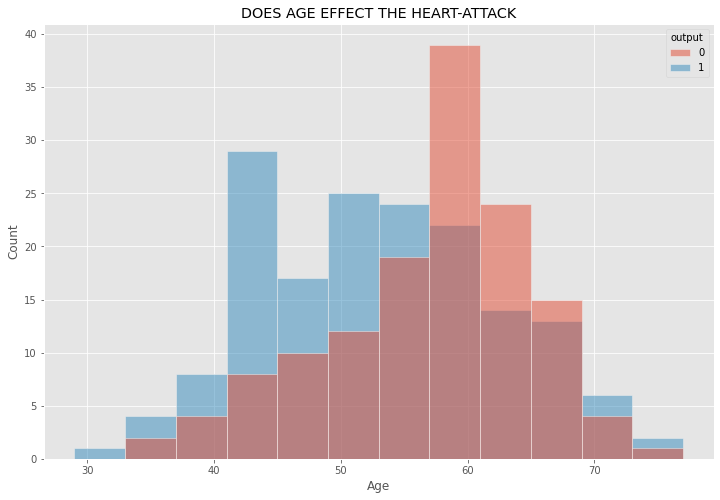

In [39]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
sns.histplot(data = data, x = 'age', hue = 'output')
plt.title("DOES AGE EFFECT THE HEART-ATTACK")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()